In [1]:
import sys
import importlib

import numpy as np
import pandas as pd
import os.path

# Import the model we are using
import seaborn as sns
import matplotlib.pyplot as plt



In [8]:
# run this command only the first time to download the BTSSlayers library from gitbub
!wget -O BTSSlayers.py https://raw.githubusercontent.com/Critt-Kent/Behavioral-Translation-Style-Space/refs/heads/main/BTSSlayers.py
!wget -O sorted.gaze.clean.txt https://raw.githubusercontent.com/Critt-Kent/Behavioral-Translation-Style-Space/refs/heads/main/sorted.gaze.clean.txt


--2025-09-10 19:54:34--  https://raw.githubusercontent.com/Critt-Kent/Behavioral-Translation-Style-Space/refs/heads/main/BTSSlayers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59077 (58K) [text/plain]
Saving to: ‘BTSSlayers.py’

BTSSlayers.py       100%[===================>]  57.69K  --.-KB/s    in 0.01s   

2025-09-10 19:54:34 (5.42 MB/s) - ‘BTSSlayers.py’ saved [59077/59077]



In [80]:
import BTSSlayers as btss

In [9]:
# set dataframe vizualisation options 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Key-Gaze analysis
- Read AU and FD data
- Compute Gaze measures
- Correlate with PUB and KBI 

In [13]:
# Read a large set of 491 translation sessions from the TPR-DB
GD = pd.read_csv('sorted.gaze.clean.txt', sep="\t", dtype=None)

# read the Tables from the TPR-DB
BTSS1 = btss.readBTSSsessions(GD['Study-Session'], layers = ['au1', 'fd'], verbose=0)

# rename for easier use
AUdf = BTSS1['au1']
FDdf = BTSS1['fd'] 
print("AUs:", AUdf.shape, "FDs:", FDdf.shape)

AUs: (263719, 73) FDs: (999492, 22)


In [39]:
# extract one row per session 
AUdf['StudySession'] = AUdf['Study'] + '-' + AUdf['Session']
AUdf = AUdf.drop_duplicates(subset=['StudySession'])
AUdf.shape

(490, 73)

In [40]:
FDdf['StudySession'] = FDdf['Study'] + '-' + FDdf['Session']
FDdf = FDdf.drop_duplicates(subset = ['StudySession'])
FDdf.shape

(490, 25)

In [81]:
AUdf.head()

,Id,Study,Session,SL,TL,Task,Text,Part,Time,Phase,Type,Dur,SGid,SGnbr,TGid,TGnbr,Ins,Del,PosS,PosT,Scatter,CrossS,CrossT,Gram5,GazePath,FixS,TrtS,FixT,TrtT,KBI,PUB,Edit,ProbSgaze,ProbTgaze,ProbCgaze,ProbSTCgaze,HSgaze,HTgaze,HCgaze,HSTCgaze,StudySession,End,Dur_L,Dur_R,Dur_S,Dur_N,STs_TTs,NextTime,Total_Dur,One,MaxDur,RelDur_L,RelDur_R,RelDur_S,RelDur_N,GPlabel,KBtype,PUnbr,PUdur,KBnbr,KBdur,HOF,WperFix,HOFnbr,Tstyles,LogDur,LogDur_L,LogDur_R,LogDur_S,LogIns,LogDel,LogKBI,LogPUB
0,1,ACS08,P03_T1,en,da,T,1,P03,3676,O,1,73487,---,0,---,0,0,0,---,---,0.0,0.0,0.0,10000,S:16+S:16+S:14+S:17+S:17+S:19+S:20+S:19+S:21+S...,334,65695,1,0,336,738,---,0.7080,0.4756,0.5423,0.3527,0.6026,1.3953,1.0144,1.6631,ACS08-P03_T1,77163,55485,8053,9929,20,116,77163.0,73487,1,73487,0.755032,0.109584,0.135112,0.000272,L,P,1,80578,1,80578,O,0.345238,1,0,11.204877,10.923886,8.993924,9.203316,0.0,0.0,5.820083,6.605298
1053,1,ACS08,P08_T1,en,da,T,1,P08,2384,O,2,34,---,0,---,0,0,0,---,---,0.0,0.0,0.0,20000,T:1,0,0,1,34,324,570,---,1.0000,1.0000,0.8333,0.8333,0.0000,0.0000,0.6500,0.6500,ACS08-P08_T1,2418,0,0,34,0,1,2418.0,34,1,34,0.000000,0.000000,1.000000,0.000000,S,0,1,6776,1,34,F,0.500000,1,0,3.555348,0.000000,0.000000,3.555348,0.0,0.0,5.783825,6.347389
1659,1,ACS08,P10_T1,en,da,T,1,P10,1388,O,1,2572,---,0,---,0,0,0,---,---,0.0,0.0,0.0,10000,S:4+S:4+S:4+S:3+S:4+S:6+S:6+S:8+S:9+S:10+S:11+...,13,2332,0,0,290,669,---,0.7179,0.3333,0.4615,0.3205,0.7199,1.8223,1.2345,2.0262,ACS08-P10_T1,3960,1635,0,937,0,9,3960.0,2572,1,2572,0.635692,0.000000,0.364308,0.000000,LS,P,1,3547,1,3547,O,0.642857,1,0,7.852828,7.400010,0.000000,6.843750,0.0,0.0,5.673323,6.507278
2268,1,ACS08,P07_T3,en,da,T,3,P07,1228,O,2,658,---,0,---,0,0,0,---,---,0.0,0.0,0.0,20000,T:153+T:153+T:153+S:159,1,0,3,598,294,732,---,0.8167,0.0833,0.2667,0.0833,0.5159,1.7880,0.9897,1.9830,ACS08-P07_T3,1886,0,579,59,20,1,1886.0,658,1,658,0.000000,0.879939,0.089666,0.030395,R,P,1,7472,1,7472,O,0.200000,1,0,6.490724,0.000000,6.363028,4.094345,0.0,0.0,5.686975,6.597146
2675,1,ACS08,P14_T3,en,da,T,3,P14,166,O,1,24861,---,0,---,0,0,0,---,---,0.0,0.0,0.0,10000,S:30+S:26+S:26+S:28+S:30+S:30+S:33+S:33+S:35+S...,107,22668,0,0,348,1302,---,0.4523,0.2791,0.3925,0.2555,0.8235,1.6250,1.0093,1.7631,ACS08-P14_T3,25027,20077,2052,2732,0,43,25027.0,24861,1,24861,0.807570,0.082539,0.109891,0.000000,L,P,1,63334,1,63334,O,0.398148,1,0,10.121096,9.907380,7.627057,7.913155,0.0,0.0,5.855072,7.172425


In [42]:
FDdf.head()

,Id,Study,Session,SL,TL,Task,Text,Part,Time,Dur,Win,Seg,STid,SGid,TTid,TGid,Cur,X,Y,Paral,Edit,EDid,StudySession,LogDur,StudySessionWinFirst
0,1,ACS08,P03_T1,en,da,T,1,P03,3676,99,1,2,16,16,13,13,90,1022,75,0,---,---,ACS08-P03_T1,4.605170,ACS08-P03_T1-1.16
4398,1,ACS08,P08_T1,en,da,T,1,P08,2384,80,2,1,1,1,1,1,0,70,349,46,A,1+,ACS08-P08_T1,4.394449,ACS08-P08_T1-2.1
7507,1,ACS08,P10_T1,en,da,T,1,P10,1388,80,1,1,4,4,2,2+6+7+8+9,28,256,118,0,---,---,ACS08-P10_T1,4.394449,ACS08-P10_T1-1.4
9980,1,ACS08,P07_T3,en,da,T,3,P07,1228,59,2,9,143,143,153,153,0,100,630,0,---,---,ACS08-P07_T3,4.094345,ACS08-P07_T3-2.143
11510,1,ACS08,P14_T3,en,da,T,3,P14,166,279,1,2,30,30,39,39,141,260,191,0,---,---,ACS08-P14_T3,5.634790,ACS08-P14_T3-1.30


## Log duration of Fixations

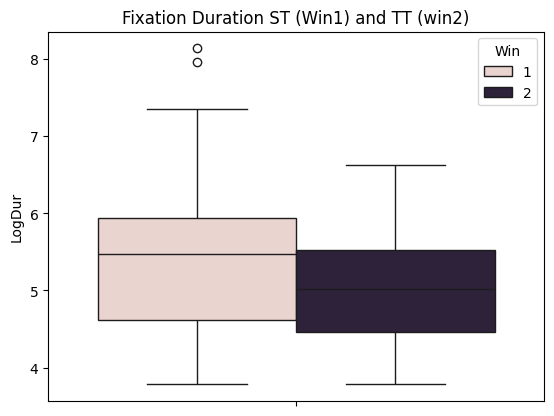

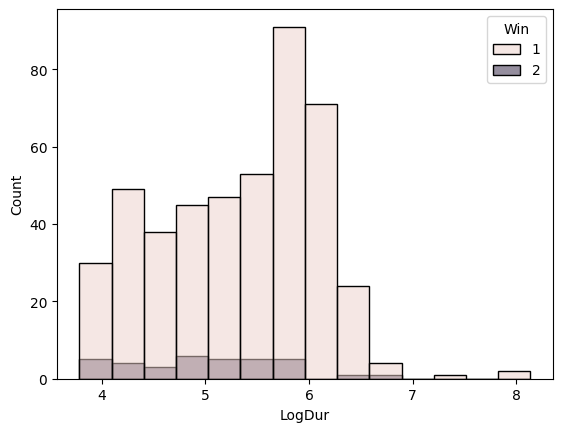

In [32]:
# Log duration of fixation
FDdf['LogDur'] = np.log1p(FDdf.Dur)

sns.boxplot(data=FDdf, y="LogDur", hue='Win').set(title='Fixation Duration ST (Win1) and TT (win2)')
plt.show()

sns.histplot(data=FDdf, x="LogDur", hue='Win')
plt.show()



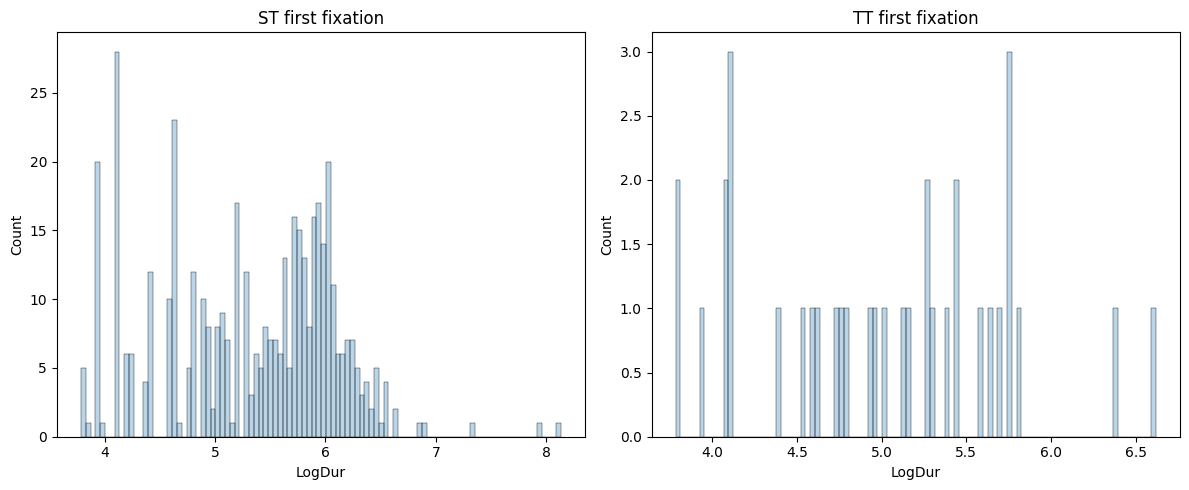

In [59]:
# Log duration of first fixation on ST and TT words
FDdf['StudySessionWinFirst'] = FDdf['StudySession'] + '-' + FDdf['Win'].astype(str)  + '.' + FDdf['SGid'].astype(str) 

FDst = FDdf[FDdf.Win == 1].copy()
FDtt = FDdf[FDdf.Win == 2].copy()

FDst['StudySessionFirst'] = FDst['StudySession'] + FDst['SGid'].astype(str)
FDtt['StudySessionFirst'] = FDtt['StudySession'] + FDtt['SGid'].astype(str)

FDst_first = FDst.drop_duplicates(subset=['StudySessionFirst'], keep='first')
FDtt_first = FDtt.drop_duplicates(subset=['StudySessionFirst'], keep='first')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=FDst_first, x='LogDur', alpha=0.3, bins=100, ax=ax1)
ax1.set_title('ST first fixation')

sns.histplot(data=FDtt_first, x='LogDur', alpha=0.3, bins=100, ax=ax2)
ax2.set_title('TT first fixation')

fig.tight_layout()
plt.show()

-  Distribution is right-skewed on ST with a much longer tail extending to the right than to the left.
-  very few data points for the TT.

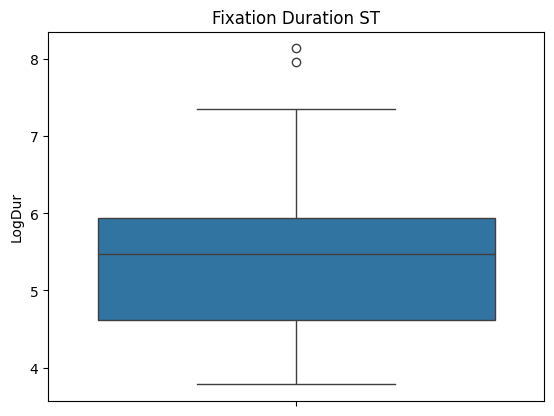

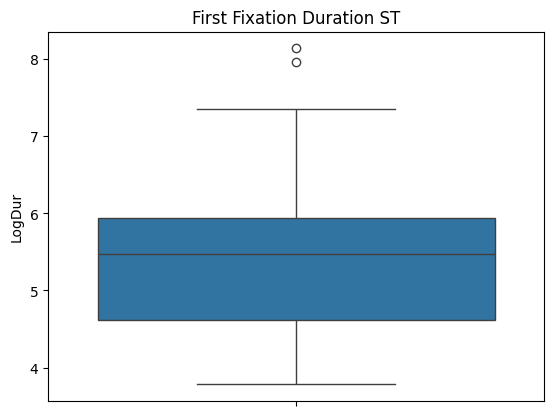

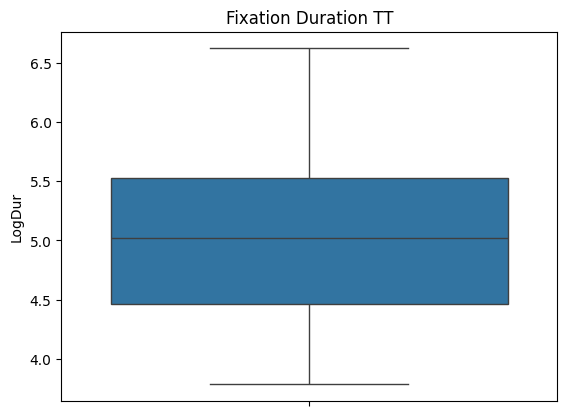

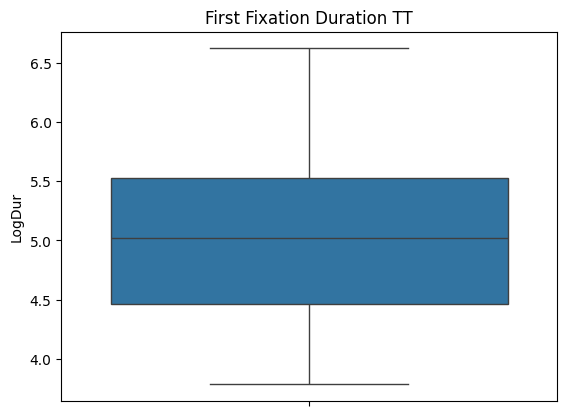

In [38]:
# boxplots
sns.boxplot(data=FDst, y="LogDur").set(title='Fixation Duration ST')
plt.show()
sns.boxplot(data=FDst_first, y="LogDur").set(title='First Fixation Duration ST')
plt.show()

sns.boxplot(data=FDtt, y="LogDur").set(title='Fixation Duration TT')
plt.show()
sns.boxplot(data=FDtt_first, y="LogDur").set(title='First Fixation Duration TT')
plt.show()



## Finding Thresholds for Automatic and Conscious processing

### Mean and Standard deviation

In [60]:
# Calculating mean and standard deviation for ST and TT Data 
mean_st = FDst_first['LogDur'].mean()
std_st = FDst_first['LogDur'].std()

mean_tt = FDtt_first['LogDur'].mean()
std_tt = FDtt_first['LogDur'].std()

print(f"ST Data: Mean = {mean_st:.2f}, Std Dev = {std_st:.2f}")
print(f"TT Data: Mean = {mean_tt:.2f}, Std Dev = {std_tt:.2f}")

ST Data: Mean = 5.32, Std Dev = 0.78
TT Data: Mean = 4.99, Std Dev = 0.73


- set thresholds based on standard deviations to distinguish between "automatic" and "conscious" processing

In [85]:
# Calculate the upper and lower threshold for ST data
# threshold_st_upper = mean_st + (2 * std_st)
# print(f"ST 'Conscious' Threshold (Mean + 2*SD): {threshold_st_upper:.2f}")

# threshold_st_lower = mean_st - (2 * std_st)
# print(f"ST 'Automatic' Threshold (Mean - 2*SD): {threshold_st_lower:.2f}")

threshold_st_upper = mean_st + std_st
print(f"ST 'Conscious' Threshold (Mean + 2*SD): {threshold_st_upper:.2f}")

threshold_st_lower = mean_st - std_st
print(f"ST 'Automatic' Threshold (Mean - 2*SD): {threshold_st_lower:.2f}")

ST 'Conscious' Threshold (Mean + 2*SD): 6.09
ST 'Automatic' Threshold (Mean - 2*SD): 4.54


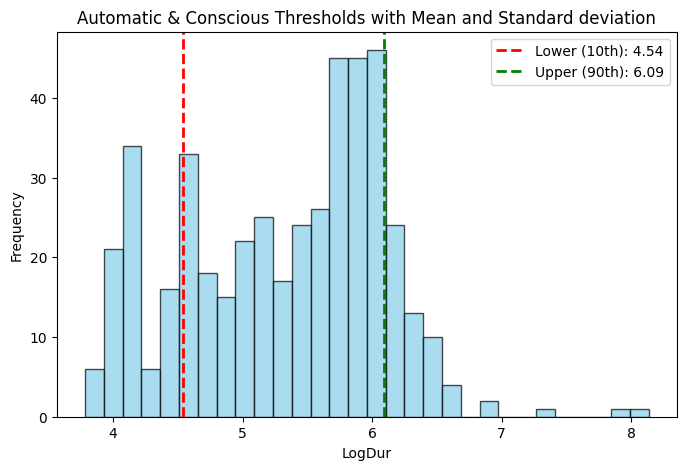

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(FDst_first['LogDur'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Mark thresholds
plt.axvline(threshold_st_lower, color='red', linestyle='--', linewidth=2, label=f'Lower (10th): {threshold_st_lower:.2f}')
plt.axvline(threshold_st_upper, color='green', linestyle='--', linewidth=2, label=f'Upper (90th): {threshold_st_upper:.2f}')

plt.xlabel("LogDur")
plt.ylabel("Frequency")
plt.title("Automatic & Conscious Thresholds with Mean and Standard deviation")
plt.legend()
plt.show()

### Quantiles
- define a threshold as the value below which a certain percentage of your data falls.

In [83]:

# Use 10th percentile for the lower and 90th for the upper.
lower_quantile = 0.10
upper_quantile = 0.90

# Calculate the two threshold values
lower_threshold = FDst_first['LogDur'].quantile(lower_quantile)
upper_threshold = FDst_first['LogDur'].quantile(upper_quantile)

print(f"Automatic Threshold (Lower Bound): {lower_threshold:.2f} (anything below this is 'Automatic')")
print(f"Conscious Threshold (Upper Bound): {upper_threshold:.2f} (anything above this is 'Conscious')")

# # Define the conditions and corresponding choices for classification
# conditions = [
#     FDst_first['LogDur'] < lower_threshold, 
#     FDst_first['LogDur'] > upper_threshold   
# ]
# choices = [
#     'Automatic',                             
#     'Conscious'                              
# ]

# # The 'default' argument is used for any row that doesn't meet any of the conditions.
# FDst_first['ProcessType'] = np.select(conditions, choices, default='Intermediate')

# # Check the results to see how data was categorized
# print("\nValue counts for the classification:")
# print(FDst_first['ProcessType'].value_counts())

Automatic Threshold (Lower Bound): 4.11 (anything below this is 'Automatic')
Conscious Threshold (Upper Bound): 6.17 (anything above this is 'Conscious')


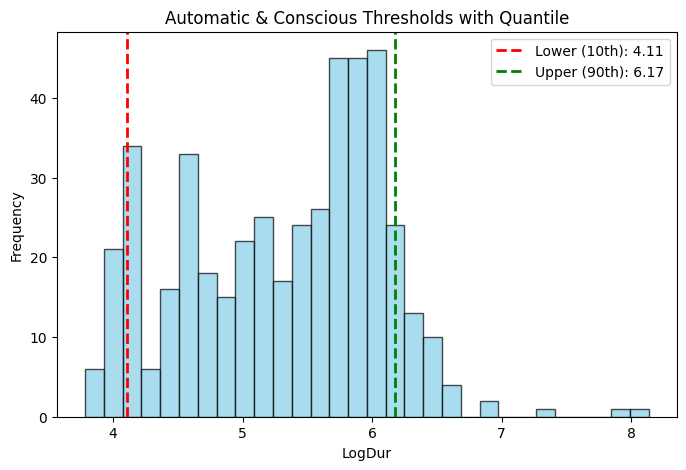

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(FDst_first['LogDur'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Mark thresholds
plt.axvline(lower_threshold, color='red', linestyle='--', linewidth=2, label=f'Lower (10th): {lower_threshold:.2f}')
plt.axvline(upper_threshold, color='green', linestyle='--', linewidth=2, label=f'Upper (90th): {upper_threshold:.2f}')

plt.xlabel("LogDur")
plt.ylabel("Frequency")
plt.title("Automatic & Conscious Thresholds with Quantile")
plt.legend()
plt.show()

### Gaussian Mixture Model (GMM)
- assumes that data is not one single distribution, but a mixture of two or more distributions

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
from scipy.optimize import fsolve

# Reshape your data for scikit-learn
X = FDst_first['LogDur'].values.reshape(-1, 1)

# Instantiate and fit the GMM with 3 components
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

print("GMM has been successfully fitted.")


GMM has been successfully fitted.


In [77]:
"""GMM doesn't order its components. We need to get the means, standard deviations, and weights, and 
then sort them from "fastest" to "slowest" to label them correctly."""

# Extract the parameters of the three fitted Gaussians
means = gmm.means_.flatten()
covariances = gmm.covariances_.flatten()
weights = gmm.weights_.flatten()

# Calculate standard deviations from covariances
stds = np.sqrt(covariances)

# Sort the components by their means (from low to high)
sort_indices = np.argsort(means)
means = means[sort_indices]
stds = stds[sort_indices]
weights = weights[sort_indices]

auto_params = {'mean': means[0], 'std': stds[0], 'weight': weights[0]}
inter_params = {'mean': means[1], 'std': stds[1], 'weight': weights[1]}
cons_params = {'mean': means[2], 'std': stds[2], 'weight': weights[2]}

print(f"Automatic Component: Mean={auto_params['mean']:.2f}, Std={auto_params['std']:.2f}")
print(f"Intermediate Component: Mean={inter_params['mean']:.2f}, Std={inter_params['std']:.2f}")
print(f"Conscious Component: Mean={cons_params['mean']:.2f}, Std={cons_params['std']:.2f}")

Automatic Component: Mean=4.31, Std=0.33
Intermediate Component: Mean=5.18, Std=0.39
Conscious Component: Mean=5.89, Std=0.43


In [74]:
# Define a function that finds the intersection of two Gaussian PDFs
"""threshold between two distributions is the point x where their probability density functions (PDFs) are equal"""

def find_intersection(mean1, std1, mean2, std2):
    func = lambda x: norm.pdf(x, mean1, std1) - norm.pdf(x, mean2, std2)
    initial_guess = (mean1 + mean2) / 2
    return fsolve(func, initial_guess)[0]

# Calculate the two thresholds
threshold_auto_inter = find_intersection(auto_params['mean'], auto_params['std'], 
                                          inter_params['mean'], inter_params['std'])

threshold_inter_cons = find_intersection(inter_params['mean'], inter_params['std'], 
                                          cons_params['mean'], cons_params['std'])

print(f"\nCalculated Thresholds:")
print(f"Threshold 1 (anything below is 'Automatic'): {threshold_auto_inter:.2f}")
print(f"Threshold 2 (anything above is 'Conscious'): {threshold_inter_cons:.2f}")


Calculated Thresholds:
Threshold 1 (anything below is 'Automatic'): 4.73
Threshold 2 (anything above is 'Conscious'): 5.54


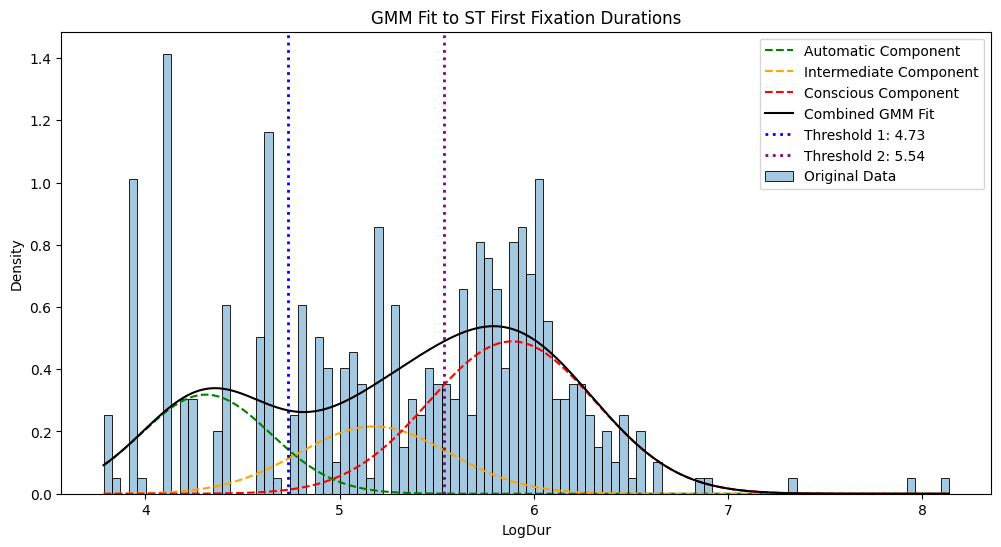

In [76]:
plt.figure(figsize=(12, 6))

# Plot the original data histogram
sns.histplot(data=FDst_first, x='LogDur', bins=100, stat='density', alpha=0.4, label='Original Data')

# Plot the fitted Gaussian components
x_axis = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
colors = ['green', 'orange', 'red']
labels = ['Automatic Component', 'Intermediate Component', 'Conscious Component']

for i, params in enumerate([auto_params, inter_params, cons_params]):
    # multiply the PDF by its weight to scale it correctly
    pdf = norm.pdf(x_axis, params['mean'], params['std']) * params['weight']
    plt.plot(x_axis, pdf, color=colors[i], linestyle='--', label=labels[i])

# Plot the combined GMM PDF
total_pdf = gmm.score_samples(x_axis)
plt.plot(x_axis, np.exp(total_pdf), color='black', label='Combined GMM Fit')

# Draw the threshold lines
plt.axvline(threshold_auto_inter, color='blue', linestyle=':', linewidth=2, label=f'Threshold 1: {threshold_auto_inter:.2f}')
plt.axvline(threshold_inter_cons, color='purple', linestyle=':', linewidth=2, label=f'Threshold 2: {threshold_inter_cons:.2f}')

plt.title('GMM Fit to ST First Fixation Durations')
plt.xlabel('LogDur')
plt.ylabel('Density')
plt.legend()
plt.show()